In [1]:
import numpy as np
import matplotlib.mlab as mlb
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# Increase or reduce the interpolation resolution with these numbers.
nx = 41
ny = 37

In [3]:
def plotSurf(data,name):
    x = data[:,0]-500.0
    y = data[:,1]-200.0
    z = data[:,2]
    xi = np.linspace(0.0, 4000.0, nx)
    yi = np.linspace(0.0, 3600.0, ny)
    #xi = np.linspace(min(x), max(y), nx)
    #yi = np.linspace(min(x), max(y), ny)
    zi = mlb.griddata(x, y, z, xi, yi,interp='linear')
    #print len(zi),len(zi[0])

    fig = plt.figure(figsize=(8,4))
    #plt.contour(xi, yi, zi)
    plt.pcolor(xi, yi, zi*1e-3)
    plt.colorbar(label=name+' (km)')
    plt.xlabel("x (km)")
    plt.ylabel("y (km)")
    
    return xi, yi, zi

<IPython.core.display.Javascript object>


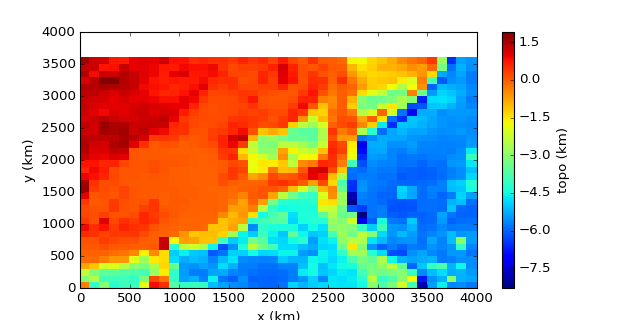

In [4]:
data = np.loadtxt("Topo.xyz")
xi, yi, zi = plotSurf(data,"topo")

fo = open("Topo_rect.xyz","w")
for j in range(ny):
    for i in range(nx):
        # Save interface elevations in km 
        # so that all the coordinates can be scaled to meters 
        # consistently in Trelis.
        print >> fo, "%g %g %g" % (xi[i], yi[j], zi[j,i]*1e-3) 
fo.close()

<IPython.core.display.Javascript object>


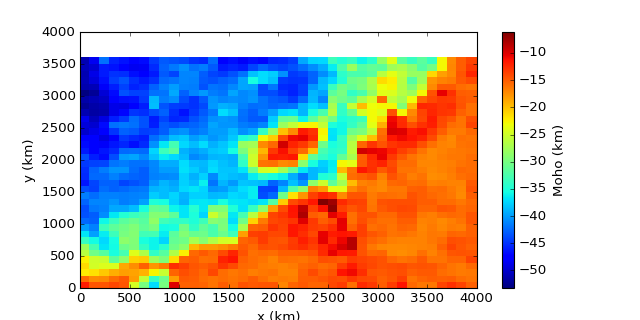

In [7]:
data = np.loadtxt("Moho.xyz")
xi, yi, zi = plotSurf(data,"Moho")

fo = open("Moho_rect.xyz","w")
for j in range(len(yi)):
    for i in range(len(xi)):
        # Save interface elevations in km 
        # so that all the coordinates can be scaled to meters 
        # consistently in Trelis.
        print >> fo, "%g %g %g" % (xi[i], yi[j], zi[j,i]*1e-3)
fo.close()

<IPython.core.display.Javascript object>


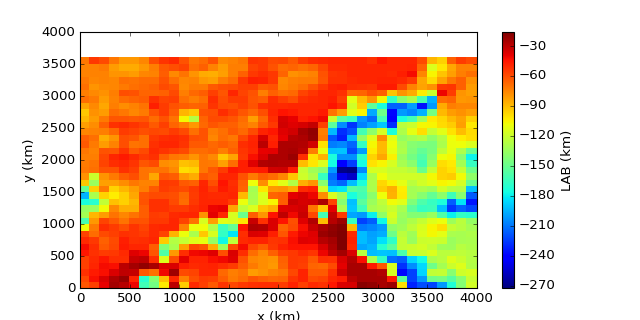

In [8]:
data = np.loadtxt("LAB.xyz")
xi, yi, zi = plotSurf(data,"LAB")

fo = open("LAB_rect.xyz","w")
for j in range(len(yi)):
    for i in range(len(xi)):
        # Save interface elevations in km 
        # so that all the coordinates can be scaled to meters 
        # consistently in Trelis.
        print >> fo, "%g %g %g" % (xi[i], yi[j], zi[j,i]*1e-3)
fo.close()